In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

import os
import tempfile

import seaborn as sns

# import cleaned data

In [2]:
insurance_df = pd.read_csv("insurance_new.csv")
insurance_df.head()

,Unnamed: 0,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,DamageImportance,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,...,ClaimInvolvedCovers_Windscreen Theft,FirstPartyVehicleType_Car,FirstPartyVehicleType_Caravan,FirstPartyVehicleType_Motorcycle,FirstPartyVehicleType_PrivateCar,ConnectionBetweenParties_SameAddress,ConnectionBetweenParties_SameBankAccount,ConnectionBetweenParties_SameEmail,ConnectionBetweenParties_SamePhone,ConnectionBetweenParties_SamePolice
0,0,0.0,0,0,1,1,104.0,0.25,1,4624.73,...,0,1,0,0,0,0,0,0,0,0
1,1,0.0,0,0,0,3,230.0,0.50,1,1606.81,...,0,1,0,0,0,0,0,0,0,0
2,2,0.0,0,0,0,9,93.0,0.25,0,998.20,...,0,1,0,0,0,0,0,0,0,0
3,3,0.0,0,0,0,2,56.0,0.25,0,2506.92,...,0,1,0,0,0,0,0,0,0,0
4,4,0.0,1,0,0,4,110.0,0.25,0,12.00,...,0,1,0,0,0,0,0,0,0,0


# Data split & normalisation

In [3]:
# Divide fraudulent and non-fraudulent observations
df_frau = insurance_df.loc[insurance_df["Fraud"]==1]
df_nofr = insurance_df.loc[insurance_df["Fraud"]==0]
# Build X set and y set
X_frau = df_frau.drop(columns = ["Fraud"])
Y_frau = df_frau["Fraud"]
X_nofr = df_nofr.drop(columns = ["Fraud"])
Y_nofr = df_nofr["Fraud"]
print("X with fraud:", X_frau.shape)
print("X without fraud:", X_nofr.shape)
print("proportion:", X_frau.shape[0]/X_nofr.shape[0])

# Split Train & Other dataset without fraudulent observations
X_train, X_other, Y_train, Y_other = train_test_split(X_nofr, Y_nofr, test_size=0.4, random_state = 111)
print("Train:",X_train.shape)
print("Other:",X_other.shape)
# Split Vali & Test dataset without fraudulent observations
X_test_n, X_vali_n, Y_test_n, Y_vali_n = train_test_split(X_other, Y_other, test_size=0.3, random_state = 111)
print("Test_n:",X_test_n.shape)
print("Vali_n:", X_vali_n.shape)

# Split fraudulent observations equally
X_test_y, X_vali_y, Y_test_y, Y_vali_y = train_test_split(X_frau, Y_frau, test_size=0.3, random_state = 111)
print("Test_y:",X_test_y.shape)
print("Vali_y:", X_vali_y.shape)

# Concate observations with / without fraudulent observations in test & vali dataset
X_test = pd.concat([X_test_n, X_test_y], axis = 0, ignore_index = True)
Y_test = pd.concat([Y_test_n, Y_test_y], axis = 0, ignore_index = True)
X_vali = pd.concat([X_vali_n, X_vali_y], axis = 0, ignore_index = True)
Y_vali = pd.concat([Y_vali_n, Y_vali_y], axis = 0, ignore_index = True)
# Drop the "ID" column
X_train = X_train.drop(columns = ["Unnamed: 0"])
Y_train = Y_train.drop(columns = ["Unnamed: 0"])
X_test = X_test.drop(columns = ["Unnamed: 0"])
Y_test = Y_test.drop(columns = ["Unnamed: 0"])
X_vali = X_vali.drop(columns = ["Unnamed: 0"])
Y_vali = Y_vali.drop(columns = ["Unnamed: 0"])
print("Train:",X_train.shape)
print("Test:",X_test.shape)
print("Vali:", X_vali.shape)

X with fraud: (115, 122)
X without fraud: (11415, 122)
proportion: 0.010074463425317565
Train: (6849, 122)
Other: (4566, 122)
Test_n: (3196, 122)
Vali_n: (1370, 122)
Test_y: (80, 122)
Vali_y: (35, 122)
Train: (6849, 121)
Test: (3276, 121)
Vali: (1405, 121)


In [4]:
# Normalisation, turn the dataframe into arrays
scaler = StandardScaler()
X_strain = scaler.fit_transform(X_train)
X_stest = scaler.transform(X_test)
X_svali = scaler.transform(X_vali)

In [5]:
# Divide each datasets by the maximun number in the list to make sure values are ranged from 0 to 1
print(X_strain.max(), X_strain.min())
print(X_svali.max(), X_svali.min())
print(X_stest.max(), X_stest.min())

82.75264346230882 -4.315627629188006
82.75264346230881 -4.315627629188006
82.75264346230881 -4.315627629188006


In [6]:
# Save the value of the largest absolute value in all dataset as the scaler
scaler_to1 = X_strain.max()

# Scale datasets with the same standard: scaler_to1
X_atrain = X_strain/scaler_to1
X_avali = X_svali/scaler_to1
X_atest = X_stest/scaler_to1
X_atrain

array([[-0.00567341, -0.00222715, -0.00308181, ..., -0.00020653,
        -0.00020653, -0.00038652],
       [ 0.02573903, -0.00222715,  0.04865182, ..., -0.00020653,
        -0.00020653, -0.00038652],
       [ 0.02573903, -0.00222715, -0.00308181, ..., -0.00020653,
        -0.00020653, -0.00038652],
       ...,
       [-0.00567341, -0.00222715, -0.00308181, ..., -0.00020653,
        -0.00020653, -0.00038652],
       [-0.00567341, -0.00222715, -0.00308181, ..., -0.00020653,
        -0.00020653, -0.00038652],
       [-0.00567341, -0.00222715,  0.04865182, ..., -0.00020653,
        -0.00020653, -0.00038652]])

# Reshape the arrays

In [7]:
# Reshape to make them be able to fit in convolutional layers later
print(X_atrain.shape, X_avali.shape, X_atest.shape)

(6849, 121) (1405, 121) (3276, 121)


In [8]:
X_atrain = X_atrain.reshape(6849, 11, 11)
X_avali = X_avali.reshape(1405, 11, 11)
X_atest = X_atest.reshape(3276, 11, 11)
X_atrain.shape

(6849, 11, 11)

# Add noise to non fraud data

In [9]:
noise = 0.2

X_train_noisy = X_atrain + noise * tf.random.normal(shape=X_atrain.shape) 
X_vali_noisy = X_avali + noise * tf.random.normal(shape=X_avali.shape)
X_test_noisy = X_atest + noise * tf.random.normal(shape=X_atest.shape)

X_train_noisy = tf.clip_by_value(X_train_noisy, clip_value_min=0., clip_value_max=1.)
X_vali_noisy = tf.clip_by_value(X_vali_noisy, clip_value_min=0., clip_value_max=1.)
X_test_noisy = tf.clip_by_value(X_test_noisy, clip_value_min=0., clip_value_max=1.)
X_train_noisy

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-06 19:46:44.712255: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 19:46:44.712426: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(6849, 11, 11), dtype=float32, numpy=
array([[[0.01850215, 0.        , 0.        , ..., 0.31514558,
         0.        , 0.        ],
        [0.32502565, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.1662599 , 0.        , 0.        , ..., 0.        ,
         0.03931275, 0.09007964],
        ...,
        [0.16435398, 0.16049603, 0.        , ..., 0.14967664,
         0.10703277, 0.0593923 ],
        [0.39124954, 0.17048801, 0.11270314, ..., 0.15712154,
         0.        , 0.        ],
        [0.        , 0.17883512, 0.        , ..., 0.13169502,
         0.14150414, 0.        ]],

       [[0.31496692, 0.23072061, 0.14031741, ..., 0.        ,
         0.38308468, 0.27668053],
        [0.        , 0.07238409, 0.12962864, ..., 0.2100436 ,
         0.        , 0.        ],
        [0.11494353, 0.14819075, 0.15718687, ..., 0.        ,
         0.00703775, 0.        ],
        ...,
        [0.17368068, 0.        , 0.        , ..., 0.

# Encoder & Decoder with convolutional layers

In [10]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape((11,11,1), input_shape=(11,11)),
    tf.keras.layers.Conv2D(3, (3, 3), activation='relu', padding='valid', strides=2),
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', padding='valid', strides=2)], name='encoder')

In [11]:
decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, activation='relu', padding='valid'),
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='relu', padding='valid'),
    tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')], name='decoder')

# Auto-encoder

In [12]:
autoencoder = tf.keras.Sequential([encoder,decoder])

In [13]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 11, 11, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 3)           30        
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 1)           28        
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [14]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTra  (None, 5, 5, 1)          10        
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 11, 11, 3)        30        
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 1)         28        
                                                                 
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Sequential)        (None, 2, 2, 1)           58        
                                                                 
 decoder (Sequential)        (None, 11, 11, 1)         68        
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [16]:
hyperband_tuner = kt.Hyperband(
    train_model,
    # objective=kt.Objective("rmse", direction="min"),
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory="logs",
    project_name="hb_tuner",
    
)

NameError: name 'train_model' is not defined

# Compile and train the autoencoder

In [17]:
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')

In [18]:
autoencoder.fit(x=X_train_noisy, y=X_atrain, epochs=10, shuffle=True,
                batch_size=32, validation_data=(X_vali_noisy, X_avali))

Epoch 1/10


2023-03-06 19:46:55.390378: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-06 19:46:55.886132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - ETA: 0s - loss: 0.1701

2023-03-06 19:47:01.332132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


215/215 [==============================] - 6s 19ms/step - loss: 0.1701 - val_loss: 0.0858
Epoch 2/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0301 - val_loss: 0.0031
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 8.0491e-04 - val_loss: 1.6364e-04
Epoch 4/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3934e-04 - val_loss: 1.3634e-04
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3400e-04 - val_loss: 1.3623e-04
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3396e-04 - val_loss: 1.3622e-04
Epoch 7/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3396e-04 - val_loss: 1.3622e-04
Epoch 8/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3396e-04 - val_loss: 1.3622e-04
Epoch 9/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3396e-04 - val_loss: 1.3622e-04
Epoch 10/10
215/215 [=========================

# Encode data and decode

In [19]:
test_encoded = encoder(X_test_noisy)
test_output = decoder(test_encoded)

In [20]:
test_output.shape

TensorShape([3276, 11, 11, 1])

In [21]:
# Output of the decoded data, the true data is "X_stest"
output = np.array(test_output)
output = output.reshape(3276,121)
output = output*scaler_to1
print(type(output), output.shape)
print(type(X_stest), X_stest.shape)

<class 'numpy.ndarray'> (3276, 121)
<class 'numpy.ndarray'> (3276, 121)


# Visualise the output mse distribution

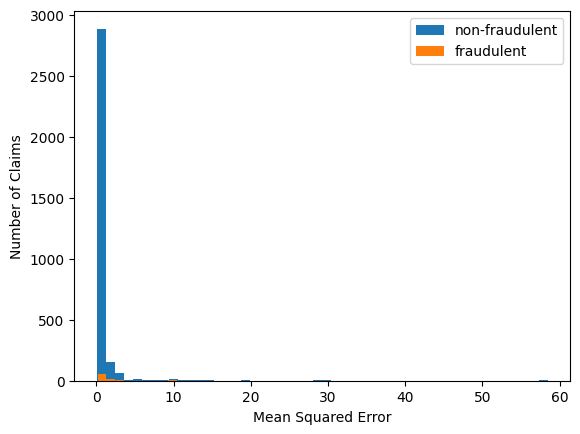

In [23]:
# Predict the labels for the validation set
#val_pred = autoencoder.predict(df_val)
val_mse = np.mean(np.power(output - X_stest, 2), axis=1)

# Separate the fraudulent and non-fraudulent claims in the validation set
fraud_mask = np.array(Y_test) == 1

# Plot the histogram of errors for the validation set
plt.hist(val_mse[~fraud_mask], bins=50, label='non-fraudulent')
plt.hist(val_mse[fraud_mask], bins=50, label='fraudulent')
plt.xlabel('Mean Squared Error')
plt.ylabel('Number of Claims')
plt.legend()

#val_mse = val_mse.reset_index(drop=True)

# Mark the mean error for fraudulent and non-fraudulent claims
val_indices = np.arange(len(val_mse))